In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv(r'C:\Users\syedk\Downloads\Bharat-Intern\House Price Prediction\housing.csv')

In [3]:
# Data Exploration
print(data.head())
print(data.describe())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
          longitude      latitude  housing_median_age   total_rooms  \
coun

<Axes: >

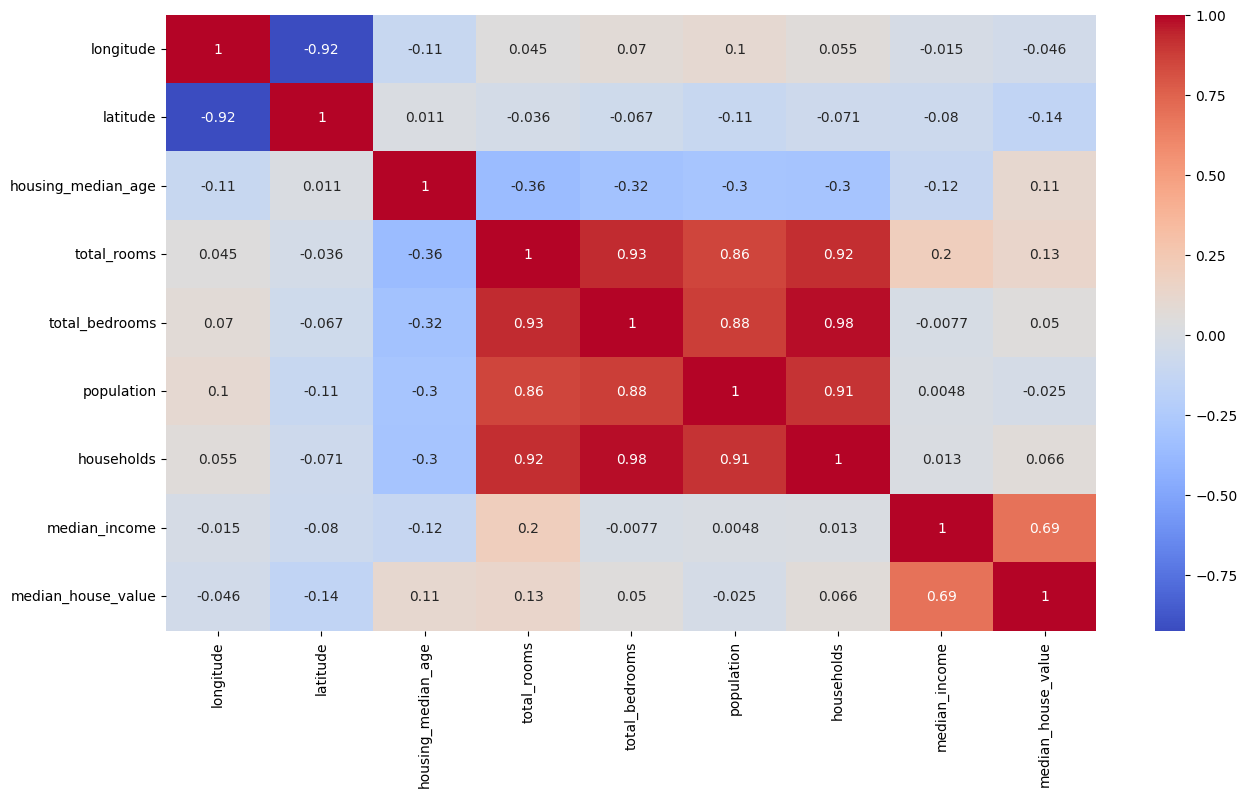

In [4]:
# Ensure only numeric columns are considered for correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])

# Data Visualization for correlation heatmap
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(),annot=True, cmap="coolwarm")


In [5]:
# Data Preprocessing
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Identify categorical columns and perform one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['ocean_proximity'], drop_first=True)

# Use StandardScaler after encoding
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train_encoded)

# Transform the test set
X_test_scaled = scaler.transform(X_test_encoded)


In [7]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'ocean_proximity' is a categorical column
categorical_features = ['ocean_proximity']
numeric_features = [col for col in X_train.columns if col not in categorical_features]

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Update the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Update the param_grid for grid search
param_grid = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# Update the grid search process
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['ocean_proximity'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 150]},
             verbose=2)

In [8]:
numeric_data['bedroom_ratio'] = numeric_data['total_bedrooms'] / numeric_data['total_rooms']
numeric_data['household_rooms'] = numeric_data['total_rooms'] / numeric_data['households']

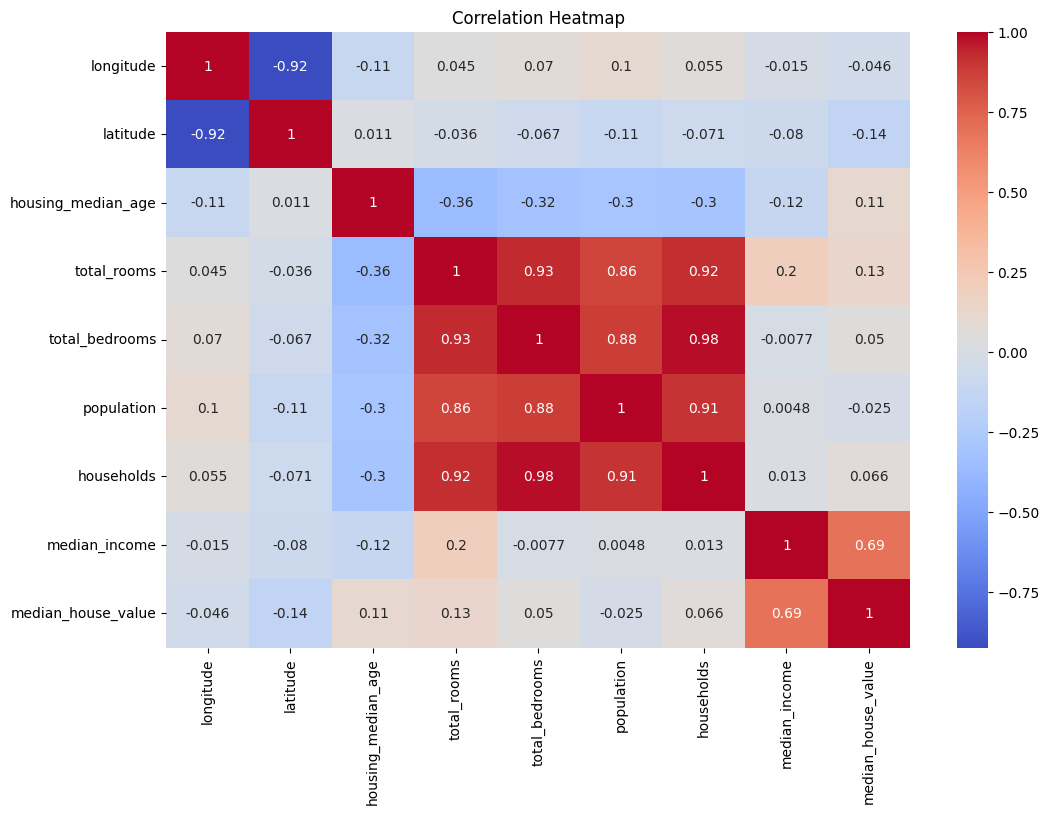

In [33]:
# Ensure only numeric columns are considered for correlation heatmap
numeric_data = data.select_dtypes(include=[np.number])

# Data Visualization for correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<Axes: >

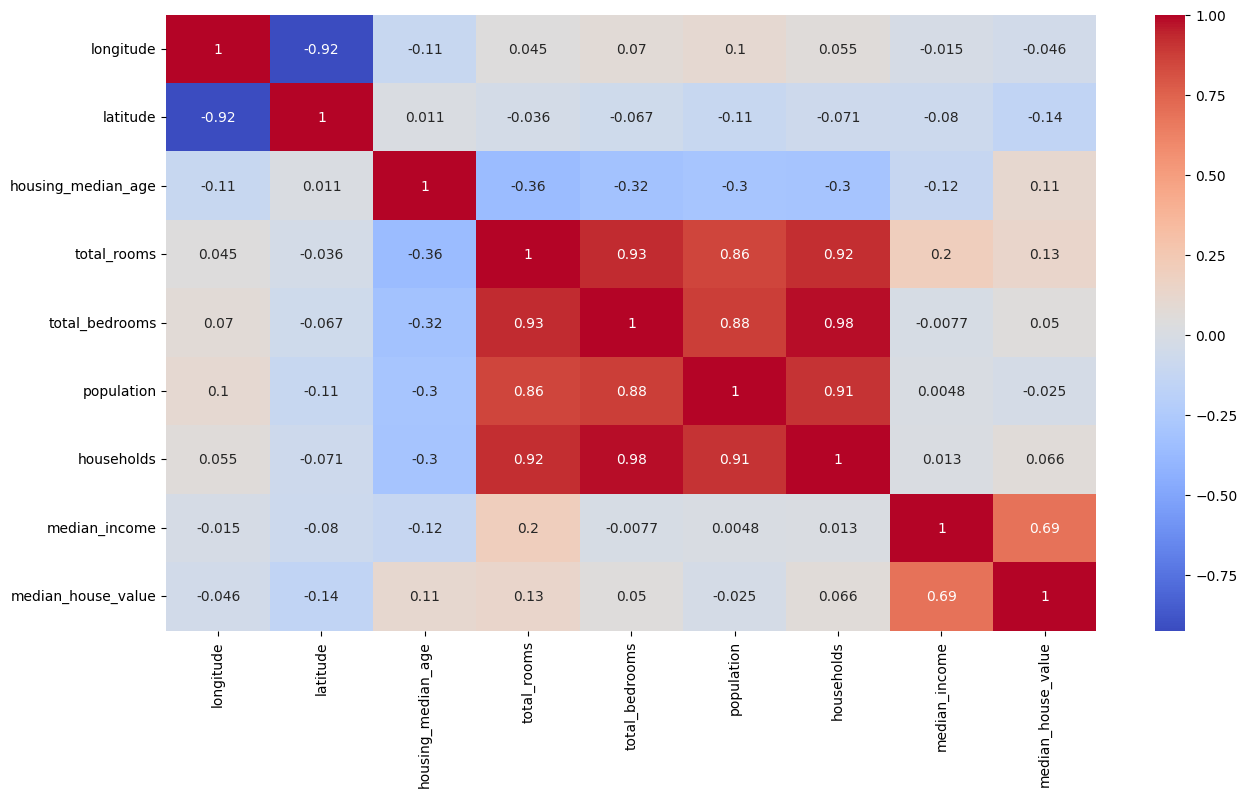

In [34]:
plt.figure(figsize=(15,8))
sns.heatmap(numeric_data.corr(),annot=True, cmap="coolwarm")

In [35]:
# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 150}


In [36]:
import pandas as pd

# For demonstration, let's assume 'X_train_numeric' is a subset of 'data'
X_train_numeric = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity']]  # Replace with actual column names

# Now, you can check for missing values
missing_values = X_train_numeric.isnull().sum()
print(missing_values)


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [37]:
from sklearn.impute import SimpleImputer

# Separate numeric and categorical columns
numeric_cols = X_train_numeric.select_dtypes(include=['number']).columns
categorical_cols = X_train_numeric.select_dtypes(exclude=['number']).columns

# Impute numeric data with mean
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric[numeric_cols] = numeric_imputer.fit_transform(X_train_numeric[numeric_cols])

# Handle categorical data (you can choose a strategy here)
# For example, impute with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_numeric[categorical_cols] = categorical_imputer.fit_transform(X_train_numeric[categorical_cols])


In [44]:
from sklearn.linear_model import LinearRegression
# Check for NaN values in X_train_numeric
print(X_train_numeric.isnull().sum())

# Drop rows with NaN values if any
X_train_numeric = X_train_numeric.dropna()

# Ensure dimensions match
if X_train_numeric.shape[0] != y_train.shape[0]:
    raise ValueError("Dimensions mismatch between X_train_numeric and y_train.")

# Initialize the Linear Regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train_numeric, y_train)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


LinearRegression()

In [45]:
print("Shape of X_train_numeric:", X_train_numeric.shape)
print("Shape of y_train:", y_train.shape)


Shape of X_train_numeric: (16512, 8)
Shape of y_train: (16512,)


Linear Regression Model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train_numeric, y_train)

# Make predictions on the training set
y_pred_train = reg.predict(X_train_numeric)

# Compute the R-squared value
r_squared = r2_score(y_train, y_pred_train)

print(f"R-squared value of the Linear Regression model on the training set: {r_squared:.2f}")


R-squared value of the Linear Regression model on the training set: 0.64


Random Forest Model

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_train_numeric, y_train, test_size=0.2, random_state=42)

In [49]:
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [50]:
# Predict on the training set
y_pred_train_rf = rf_regressor.predict(X_train)

# Calculate R-squared and RMSE for training data
r2_train_rf = r2_score(y_train, y_pred_train_rf)
rmse_train_rf = mean_squared_error(y_train, y_pred_train_rf, squared=False)

print(f"R-squared (Training): {r2_train_rf:.4f}")
print(f"RMSE (Training): {rmse_train_rf:.2f}")


R-squared (Training): 0.9741
RMSE (Training): 18521.96


In [51]:
from joblib import dump

# Example: Save Linear Regression model
dump(reg, 'linear_regression_model.joblib')

# Example: Save Random Forest model
dump(rf_regressor, 'random_forest_model.joblib')


['random_forest_model.joblib']

In [52]:
import numpy as np

# Assuming median_income_value is the value you want to predict for
median_income_value = 50000

# Reshape the median_income_value into a 2D array
input_data = np.array([median_income_value]).reshape(-1, 1)
